In [1]:
import pickle
import matplotlib.pyplot as plt
import os
%matplotlib inline
import matplotlib
SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SIZE)                # controls default text sizes
plt.rc('axes', titlesize=SIZE)           # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)          # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)          # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)          # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

In [2]:
os.chdir('C:\\Users\\Ning\\Downloads')

In [3]:
with open('over_threshold.p','rb') as h:
    over_threshold = pickle.load(h)

In [4]:
import numpy as np
thresholds = np.sort(list(over_threshold['without'].keys()))

In [5]:
import random
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [6]:
def compute_measures(dictionary_data, label='without',plot_flag=False):
    random.seed(12345)
    df_accuracy=[];df_confusion_matrix=[];df_fpr=[];df_tpr=[];df_AUC=[];
    thresholds = np.sort(list(dictionary_data[label].keys()))
    for threshold in thresholds:
        temp_data = dictionary_data[label][threshold]
        manu_scores=[];auto_scores=[]
        for sub,data in temp_data.items():
            manu,auto,time_intervals = data
            manu_scores.append(manu)
            auto_scores.append(auto)

        # shuffle
        manu_scores = np.concatenate(manu_scores)
        auto_scores = np.concatenate(auto_scores)


        kf = KFold(n_splits=10,random_state=12345,shuffle=True)

        # here are the measures of performance:
        temp_accuracy=[];temp_confusion_matrix = [];
        temp_fpr=[];temp_tpr=[];temp_AUC=[];
        ### end of measurs ###

        for train_index, test_index in kf.split(auto_scores,manu_scores):
            temp_manu = manu_scores[train_index]
            temp_auto = auto_scores[train_index]
            temp_accuracy.append(accuracy_score(temp_manu,temp_auto))
            temp_confusion_matrix.append(confusion_matrix(temp_manu,temp_auto))
            fpr,tpr,T = roc_curve(temp_manu,temp_auto)
            temp_fpr.append(fpr)
            temp_tpr.append(tpr)
            temp_AUC.append(roc_auc_score(temp_manu,temp_auto))
        ### save measures ###
        df_accuracy.append(temp_accuracy)
        df_confusion_matrix.append(temp_confusion_matrix)
        df_fpr.append(temp_fpr)
        df_tpr.append(temp_tpr)
        df_AUC.append(temp_AUC)
        
        
    if plot_flag:
        df_plot={}
        df_plot['accuracy']=np.array(df_accuracy)
        df_plot['confusion_matrix']=np.array(df_confusion_matrix)
        df_plot['fpr']=np.array(df_fpr)
        df_plot['tpr']=np.array(df_tpr)
        df_plot['AUC']=np.array(df_AUC)
        df_plot['thresholds']=np.array(thresholds)
        return df_plot
    else:
        return df_accuracy,df_confusion_matrix,df_fpr,df_tpr,df_AUC,thresholds

In [7]:
def plot_measures(df_with,df_without,label='accuracy'):
    fig,ax = plt.subplots(figsize=(12,8))
    ax.plot(df_with['thresholds'],df_with[label].mean(1),label='with sleep stages',alpha=1.,color='black')
    ax.plot(df_without['thresholds'],df_without[label].mean(1),label='without sleep stages',alpha=1.,color='red')
    ax.fill_between(df_with['thresholds'],
                    df_with[label].mean(1)+df_with[label].std(1),#/np.sqrt(df_with['accuracy'].shape[1]),
                    df_with[label].mean(1)-df_with[label].std(1),
                    alpha=0.2,color='green')#/np.sqrt(df_with['accuracy'].shape[1]))
    ax.fill_between(df_without['thresholds'],
                    df_without[label].mean(1)+df_without[label].std(1),
                    df_without[label].mean(1)-df_without[label].std(1),
                    alpha=0.2,color='green')
    _=ax.set(title = 'Performance curve of %s'%label,xlabel='Thresholds',ylabel='%s'%label)
    ax.legend(loc='best')
    return fig,ax

In [8]:
df_with = compute_measures(over_threshold,'with',plot_flag=True)
df_without = compute_measures(over_threshold,'without',plot_flag=True)

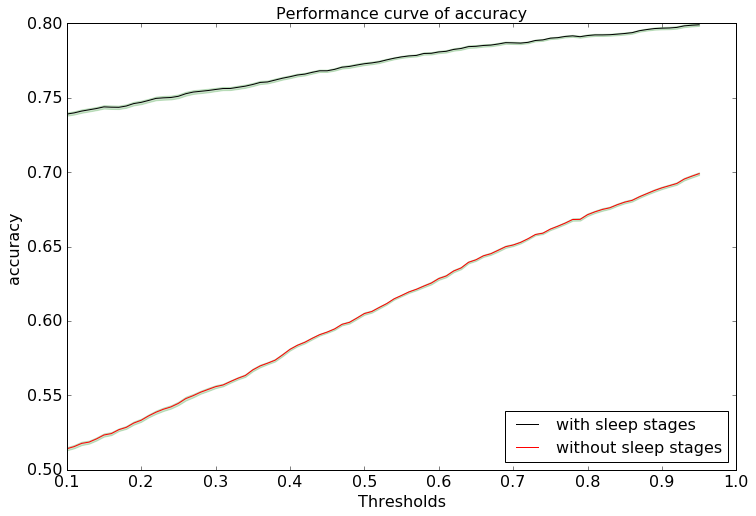

In [9]:
fig,ax = plot_measures(df_with,df_without,label='accuracy')
fig.savefig('accuracy.png')

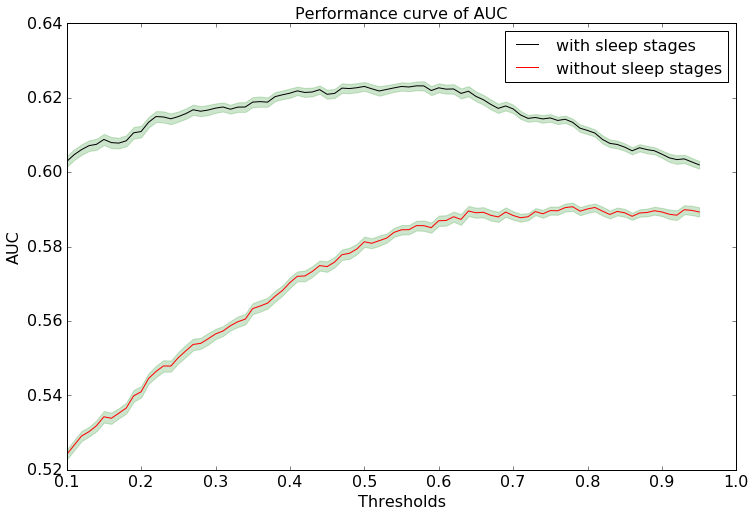

In [10]:
fig,ax = plot_measures(df_with,df_without,label='AUC')
fig.savefig('Area under the curve.png')

In [11]:
xx = df_with['thresholds']
x = df_with['fpr']
y = df_with['tpr']

In [12]:
x.mean(1)[:,1],y.mean(1)[:,1]

(array([ 0.17989317,  0.17968141,  0.17856972,  0.17782844,  0.17666371,
         0.17565791,  0.1754991 ,  0.17555203,  0.17454614,  0.17322263,
         0.17211097,  0.1715286 ,  0.17025811,  0.16956996,  0.16893478,
         0.16798181,  0.16570546,  0.16454072,  0.16348189,  0.16284653,
         0.16205234,  0.16120529,  0.16078181,  0.15988187,  0.15866419,
         0.15765829,  0.15554074,  0.15490541,  0.15379366,  0.15209952,
         0.15077593,  0.14929359,  0.14807588,  0.1462229 ,  0.14495233,
         0.14421106,  0.14283464,  0.14135237,  0.14045238,  0.13907595,
         0.13791121,  0.13664061,  0.13505237,  0.13330521,  0.13176989,
         0.13055223,  0.12944052,  0.12906996,  0.12700526,  0.12605236,
         0.12504649,  0.1241465 ,  0.12218766,  0.12044064,  0.11879942,
         0.11763471,  0.11620531,  0.11504056,  0.11324051,  0.11218163,
         0.11191694,  0.11122866,  0.1098522 ,  0.10799931,  0.10715227,
         0.10545813,  0.10450519,  0.10339346,  0.1

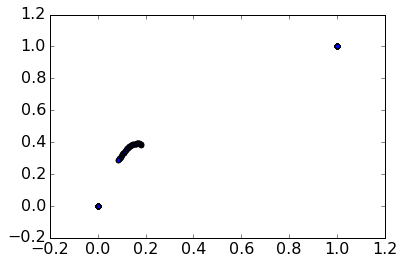

In [13]:
plt.scatter(x[:,1],y[:,1])

# over step size

In [14]:
with open('over_step_size.p','rb') as h:
    over_step_size = pickle.load(h)

In [15]:
df_with = compute_measures(over_step_size,'with',plot_flag=True)
df_without = compute_measures(over_step_size,'without',plot_flag=True)

In [18]:
df_with['thresholds']

array([ 200,  250,  300,  350,  400,  450,  500,  550,  600,  650,  700,
        750,  800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250,
       1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800,
       1850, 1900, 1950])

In [19]:
def plot_measures(df_with,df_without,label='accuracy'):
    fig,ax = plt.subplots(figsize=(12,8))
    ax.plot(df_with['thresholds'],df_with[label].mean(1),label='with sleep stages',alpha=1.,color='black')
    ax.plot(df_without['thresholds'],df_without[label].mean(1),label='without sleep stages',alpha=1.,color='red')
    ax.fill_between(df_with['thresholds'],
                    df_with[label].mean(1)+df_with[label].std(1),#/np.sqrt(df_with['accuracy'].shape[1]),
                    df_with[label].mean(1)-df_with[label].std(1),
                    alpha=0.2,color='green')#/np.sqrt(df_with['accuracy'].shape[1]))
    ax.fill_between(df_without['thresholds'],
                    df_without[label].mean(1)+df_without[label].std(1),
                    df_without[label].mean(1)-df_without[label].std(1),
                    alpha=0.2,color='green')
    _=ax.set(title = 'Performance curve of %s'%label,xlabel='Step size',ylabel='%s'%label)
    ax.legend(loc='best')
    return fig,ax

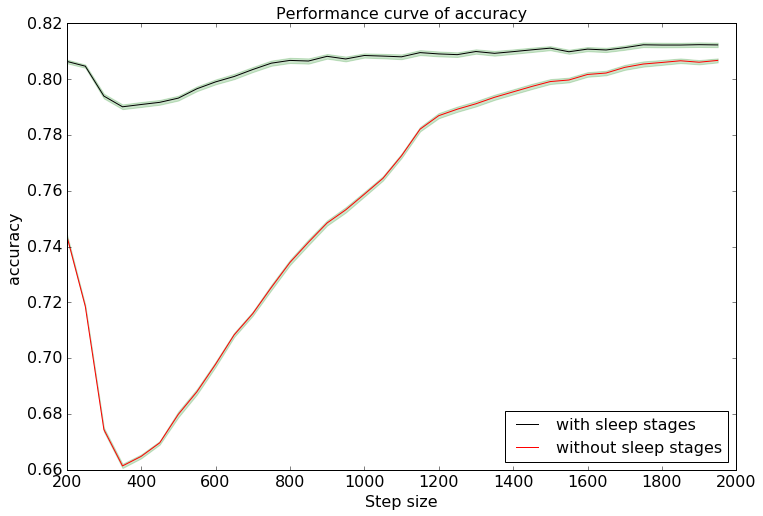

In [22]:
fig,ax = plot_measures(df_with,df_without,label='accuracy')
fig.savefig('step size_ accuracy.png')

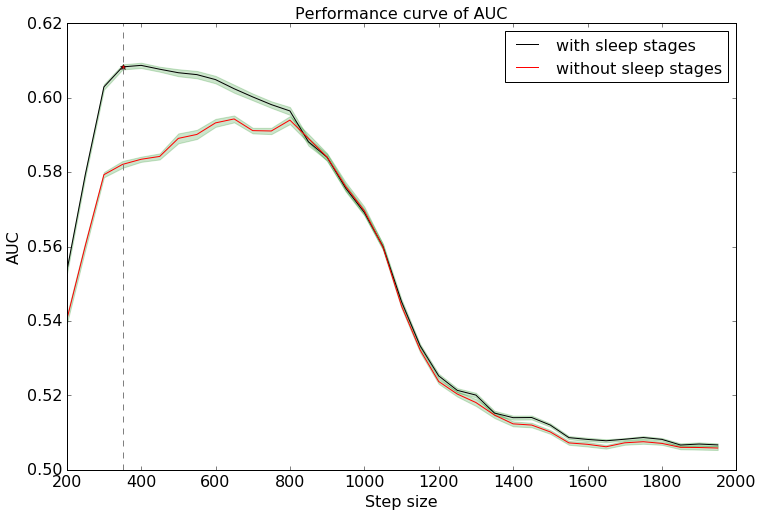

In [23]:
fig,ax = plot_measures(df_with,df_without,label='AUC')
ax.plot(df_with['thresholds'][np.argmax(df_with['AUC'].mean(1)-df_without['AUC'].mean(1))],
        df_with['AUC'][np.argmax(df_with['AUC'].mean(1)-df_without['AUC'].mean(1))].mean(),
        'r*')
ax.axvline(df_with['thresholds'][np.argmax(df_with['AUC'].mean(1)-df_without['AUC'].mean(1))],
           linestyle='--',color='grey')
fig.savefig('step size_ AUC.png')

In [155]:
df_with['thresholds'][np.argmax(df_with['AUC'].mean(1)-df_without['AUC'].mean(1))]

350